In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


In [7]:
xl = pd.ExcelFile('20190927_HeartSurvey_edited.xlsx')
survey = xl.parse("Sheet1")
survey.head()

,Duration (in seconds),RecordedDate,ResponseId,Q2.1,Q2.2,Q2.3,Q4.2_1,Q4.3,Q5.2_1,Q5.3,...,Q69.1_2,Q69.1_3,Q69.1_4,Q69.1_5,Q69.1_6,Q69.1_7,Q69.1_8,Q69.1_9,Q69.1_10,Q69.2_1
0,10106,2019-09-11 16:40:00,R_32XStqqXgBnksiC,Physician,20-24 years,20-24 years,0,Yes,100,No,...,NaN,NaN,Number 3,Number 2,NaN,NaN,NaN,Number 4,Number 1,Highly Risk Tolerant
1,4925,2019-09-11 16:40:00,R_2bTotYExBytoNpf,Physician,0-4 years,0-4 years,9,Yes,49,No,...,NaN,NaN,NaN,Number 4,Number 2,Number 1,NaN,NaN,Number 3,Neutral
2,10386,2019-09-11 16:40:00,R_28HubDeTQcBnH6b,Physician,0-4 years,0-4 years,0,Yes,100,No,...,NaN,Number 2,NaN,Number 3,NaN,NaN,NaN,Number 4,Number 5,Neutral
3,10243,2019-09-11 16:40:00,R_3rZnt5JFNJxWU8U,Physician,5-9 years,5-9 years,10,Yes,100,No,...,NaN,Number 5,Number 4,Number 3,NaN,NaN,NaN,NaN,Number 2,Neutral
4,10723,2019-09-11 16:41:00,R_8CzCYLAwaFnUdcR,Physician,20-24 years,20-24 years,8,Yes,99,No,...,NaN,NaN,Number 3,Number 4,NaN,Number 5,NaN,NaN,Number 2,Somewhat Risk Averse


In [8]:
## Extract risk data to its own dataframe

risk = survey.iloc[:, 10:130:2].fillna(50) ## All the actual questions, risk value
risk.head()

,Q7.2_1,Q8.2_1,Q9.2_1,Q10.2_1,Q11.2_1,Q12.2_1,Q13.2_1,Q14.2_1,Q15.2_1,Q16.2_1,...,Q58.2_1,Q59.2_1,Q60.2_1,Q61.2_1,Q62.2_1,Q63.2_1,Q64.2_1,Q65.2_1,Q66.2_1,Q67.2_1
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [9]:
## Rename columns for risk dataframe

risk.columns = [i for i in range(60)]
risk.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,50.0,92,63.0,0,100.0,40.0,100,0,71,97.0,...,89,40.0,100,100,77,66.0,84,15,70.0,86.0
1,77.0,100,62.0,7,50.0,50.0,80,14,98,87.0,...,83,71.0,100,94,90,80.0,100,11,79.0,82.0
2,41.0,82,35.0,6,61.0,46.0,69,5,75,57.0,...,72,54.0,94,82,73,72.0,90,24,59.0,77.0
3,59.0,100,50.0,0,90.0,60.0,96,15,88,79.0,...,76,38.0,92,74,92,50.0,85,13,50.0,50.0
4,68.0,81,58.0,3,88.0,16.0,77,15,78,75.0,...,84,76.0,92,88,86,81.0,91,31,74.0,71.0


In [10]:
## Extract waitlist decision data to its own dataframe

waitlist = survey.iloc[:, 11:130:2] ## All the actual questions, risk value
waitlist.head()

,Q7.3,Q8.3,Q9.3,Q10.3,Q11.3,Q12.3,Q13.3,Q14.3,Q15.3,Q16.3,...,Q58.3,Q59.3,Q60.3,Q61.3,Q62.3,Q63.3,Q64.3,Q65.3,Q66.3,Q67.3
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [11]:
## Rename waitlist decision columns to match the risk columns

waitlist.columns = [i for i in range(60)]
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
1,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
2,Yes,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,No
3,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes
4,Yes,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


Text(0.5,0,'Risk Score')

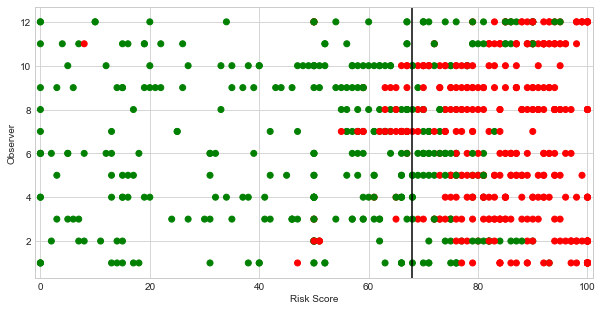

In [15]:
# All scenarios stacked into one chart, with a Mean of Means line thrown in
plt.rcParams['figure.figsize'] = [10, 5]
y = risk.index.values + 1
colors = waitlist
colors[colors == 'Yes'] = 'green'
colors[colors == 'No'] = 'red'

for question in range(60):
    x = risk[question]
    x_mean = risk[question].mean()
    plt.scatter(x, y, marker='o', color=colors[question])
plt.axvline(x=risk.mean().mean(), color='black')
plt.xlim(-1, 101)
plt.ylabel('Observer')
plt.xlabel('Risk Score')
# risk.mean().mean()

In [8]:
## Change Yes/No to green/red, for use in the graphs

waitlist[waitlist == 'Yes'] = 'green'
waitlist[waitlist == 'No'] = 'red'
waitlist.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,green,red,green,green,red,green,red,green,green,red,...,red,green,red,red,red,green,red,green,green,red
1,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
2,green,red,green,green,green,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,red
3,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green
4,green,red,green,green,red,green,red,green,red,green,...,red,green,red,red,red,green,red,green,green,green


In [5]:
xl = pd.ExcelFile('Survey questions key.xlsx')
survey_key = xl.parse("Sheet1")
survey_key.max()

Scenario                    60.00
Output Q No                 67.00
SRTR Risk                   29.24
Age                          1.00
Diagnosis                    1.00
Blood Group                  1.00
BMI                          1.00
PVR                          1.00
Creat                        1.00
Bili                         1.00
Diab                         1.00
LVAD                         2.00
ECMO                         1.00
Vent                         1.00
Total No Of Risk Factors     5.00
dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
srtr_risk = pd.DataFrame(survey_key["SRTR Risk"])
scaler = MinMaxScaler(feature_range=(0,100))
scaled_srtr_risk = scaler.fit_transform(srtr_risk)
scaled_srtr_risk = pd.DataFrame(scaled_srtr_risk, columns=['Risk'])
scaled_srtr_risk.head()

,Risk
0,46.304263
1,88.893234
2,14.430974
3,1.329683
4,0.000000


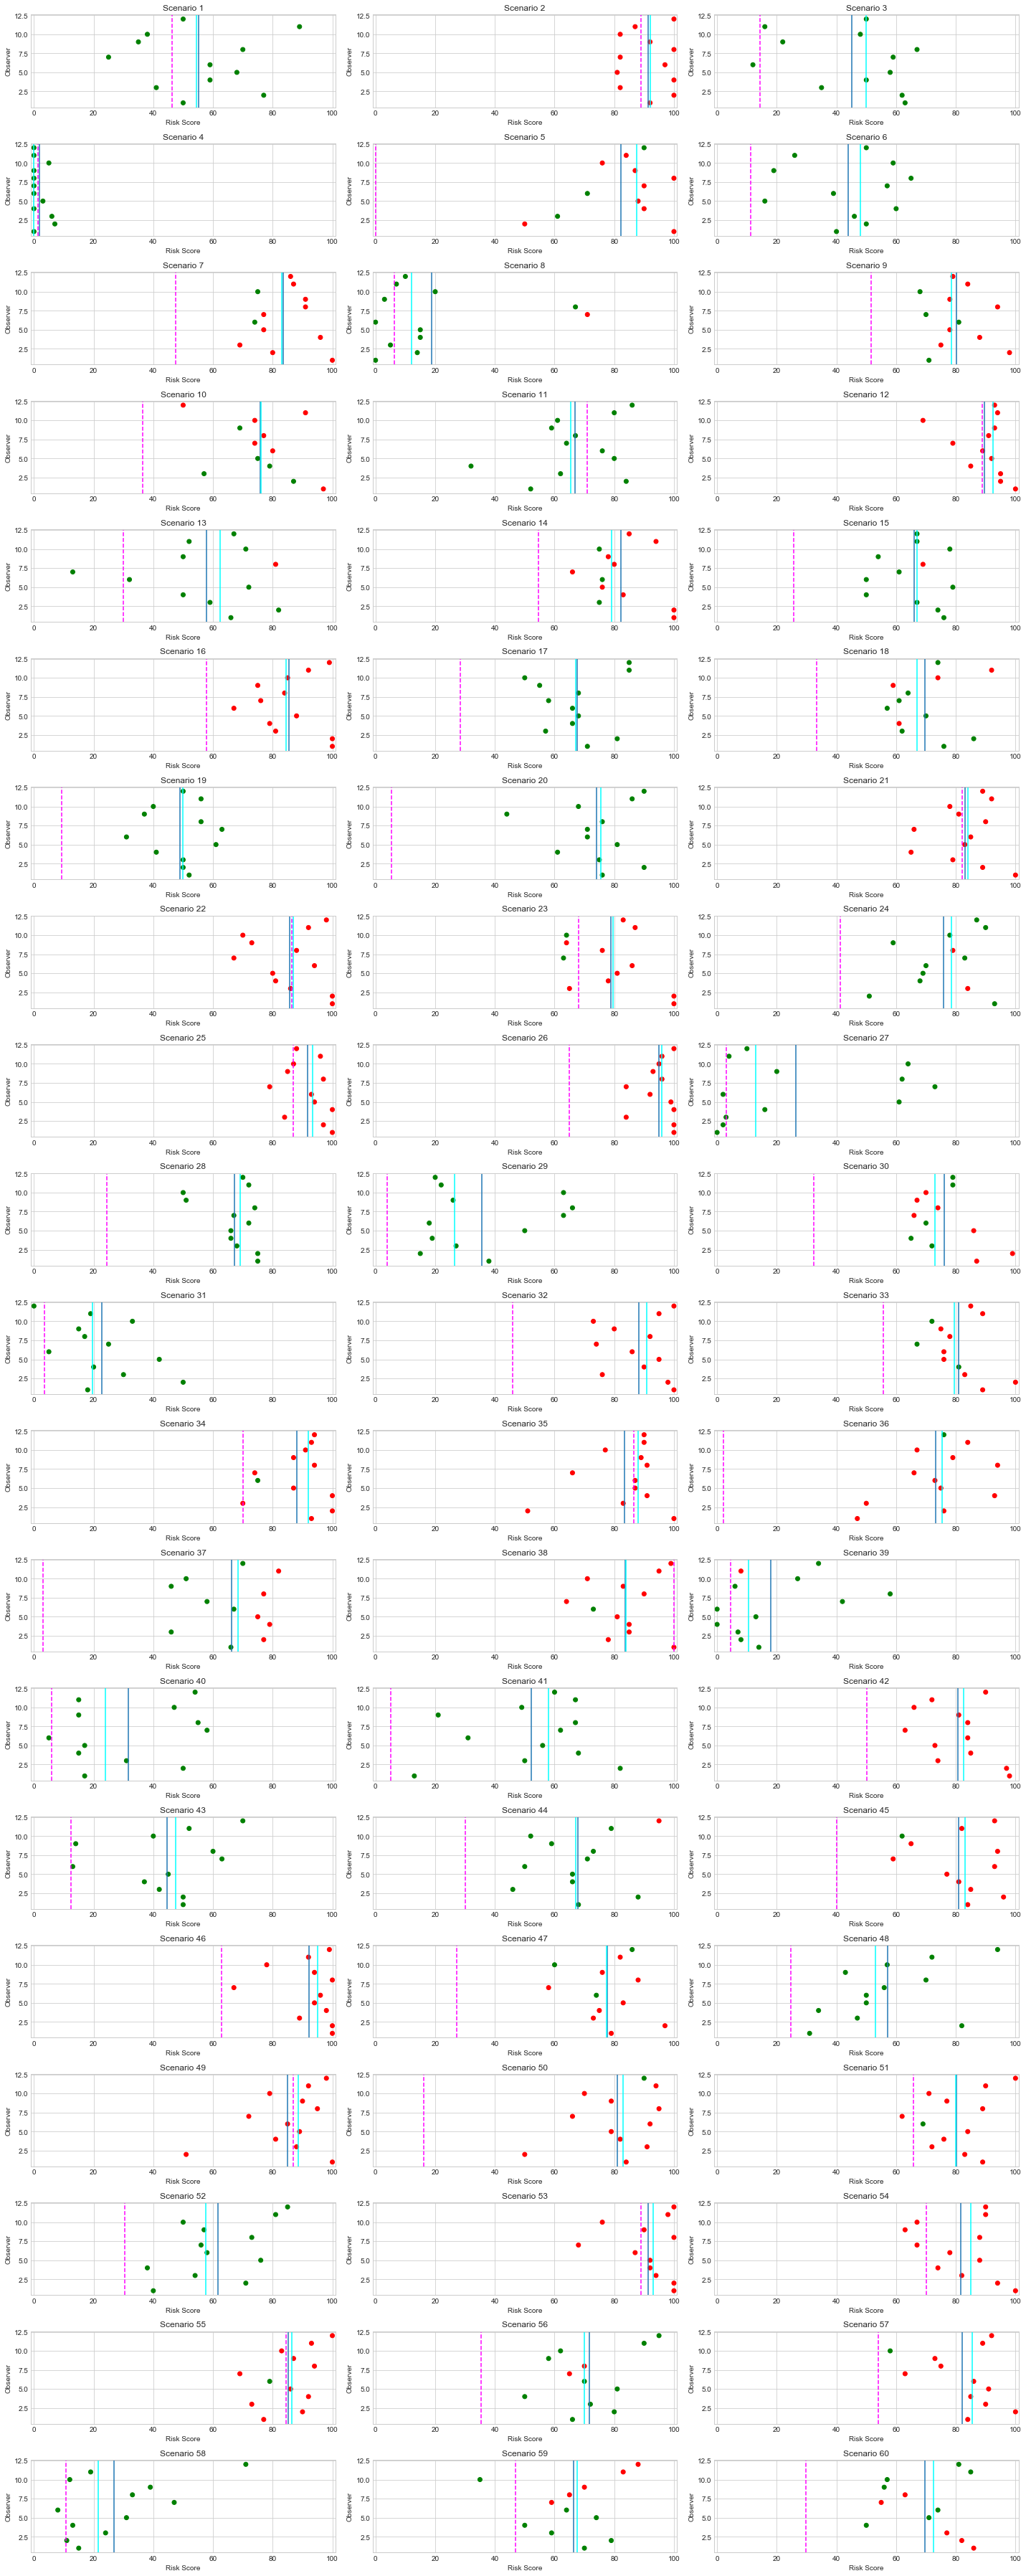

In [14]:
## Plot the results of each scenario plus their mean

def plotAllScenarios(risk, verdict, srtr):
    plt.rcParams['figure.figsize'] = [20, 50]
    fig, axs = plt.subplots(20, 3)
    observer = risk.index.values + 1
    colors = verdict
    colors[colors == 'Yes'] = 'green'
    colors[colors == 'No'] = 'red'
    question_number = 0
    for i in range(20):
        for j in range(3):
            axs[i, j].set_xlim([-1, 101])
            axs[i, j].scatter(risk[question_number], observer, color=colors[question_number])
            axs[i, j].axvline(x=risk[question_number].mean())
            axs[i, j].axvline(x=risk[question_number].median(), color='cyan')
            axs[i, j].set_title(f'Scenario {question_number + 1}')
            axs[i, j].set_ylabel('Observer')
            axs[i, j].set_xlabel('Risk Score')
            axs[i, j].axvline(srtr.iloc[question_number].values, color='magenta', linestyle='--')
            question_number += 1
    plt.tight_layout()
            
plotAllScenarios(risk, waitlist, scaled_srtr_risk)



In [ ]:
## Total sum of squares = Sigma (yi - ymean)^2
tss_noscore = []
print('---------  With Score  ---------')
for scenario in range(30):
    x = risk[scenario]
    x_mean = risk[scenario].mean()
    tss_noscore.append(np.sum((x-x_mean)**2))
    print(f'TSS, Scenario {scenario + 1}:\t{tss_noscore[scenario]}')
    
print('-------  Without Score  --------')
tss_withscore = []
for scenario in range(30):
    x = risk[scenario+30]
    x_mean = risk[scenario+30].mean()
    tss_withscore.append(np.sum((x-x_mean)**2))
    print(f'TSS, Scenario {scenario + 31}:\t{tss_withscore[scenario]}')

In [ ]:
print(f'Total Sum of Squares Mean, No SRTR score:  {np.mean(tss_noscore)}')
print(f'Total Sum of Squares Min, No SRTR score:  {np.min(tss_noscore)}')
print(f'Total Sum of Squares Max, No SRTR score:  {np.max(tss_noscore)}')
print(f'Total Sum of Squares Mean, With SRTR score:  {np.mean(tss_withscore)}')
print(f'Total Sum of Squares Min, With SRTR score:  {np.min(tss_withscore)}')
print(f'Total Sum of Squares Max, With SRTR score:  {np.max(tss_withscore)}')

In [ ]:
## Mean squared errors
mse_noscore = []
print('---------  With Score  ---------')
for scenario in range(30):
    x = risk[scenario]
    x_mean = risk[scenario].mean()
    mse_noscore.append((1/len(x))*np.sum((x-x_mean)**2))
    print(f'MSE, Scenario {scenario + 1}:\t{mse_noscore[scenario]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')
    
print('-------  Without Score  --------')
mse_withscore = []
for scenario in range(30):
    x = risk[scenario+30]
    x_mean = risk[scenario+30].mean()
    numerator = np.sum((x-x_mean)**2)
    denominator = len(x)
    mse_withscore.append(numerator/denominator)
    print(f'MSE, Scenario {scenario + 31}:\t{mse_withscore[scenario]}  (numerator: {np.sum((x-x_mean)**2)}, denominator: {len(x)})')

In [ ]:
2652.9/np.sum((risk[13]-89.5833333333333)**2)